In [1]:
from nlp_ai_utils import *

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#set this variable to true if you are using light more, or false if you are using dark mode.
JUPYTER = False

In [3]:
df = pd.read_csv('../smaller_dataset/yelp coffee/raw_yelp_review_data_processed.csv')

In [4]:
df.head()

,coffee_shop_name,full_review_text,star_rating,str_sent,sent_polarity
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5,Positive Sentiment,0.9283
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4,Positive Sentiment,0.9187
2,The Factory - Cafe With a Soul,listed in brunch spot i loved the eclectic and...,4,Positive Sentiment,0.9936
3,The Factory - Cafe With a Soul,very cool decor good drink nice seating howeve...,2,Positive Sentiment,0.8047
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4,Positive Sentiment,0.9393


Text(0.5, 1.0, 'Word Cloud of Unique Words')

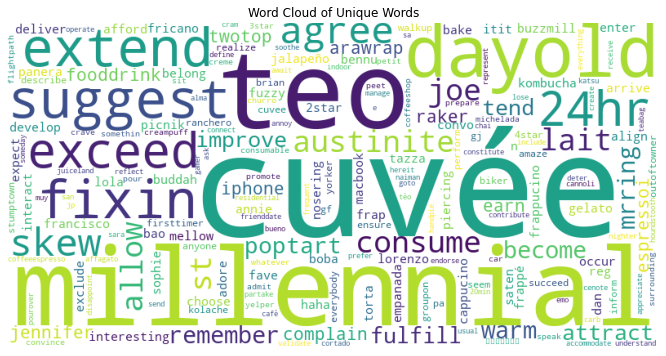

In [5]:
# Extract unique words from the text data
unique_words = set(' '.join(df['full_review_text']).split())

# Create a word cloud of the unique words
unique_wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=set(nltk.corpus.stopwords.words('english'))).generate(' '.join(unique_words))
plt.figure(figsize=(12, 6))
plt.imshow(unique_wordcloud)
plt.axis('off')
plt.title('Word Cloud of Unique Words')

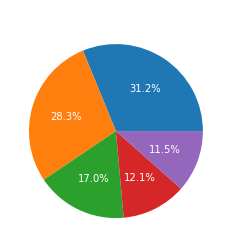

In [6]:
review_text_no_stop_words = pd.Series([remove_stop_words(review) for review in df['full_review_text']])
# Split the text into words and count their occurrences
text_data_str = ' '.join(review_text_no_stop_words.tolist())

# Split the text into words and count their occurrences
word_counts = collections.Counter(text_data_str.split())

# Get the most common words and their counts
most_common = word_counts.most_common(5)
labels = [word[0] for word in most_common]
values = [word[1] for word in most_common]

# Create the pie chart
if JUPYTER:
    color = "black"
else:
    color = "white"
plt.pie(values, labels=labels, autopct='%1.1f%%', textprops={'color': color})
plt.title('Most Common Words',color=color)
plt.show()

Text(0, 0.5, 'Word')

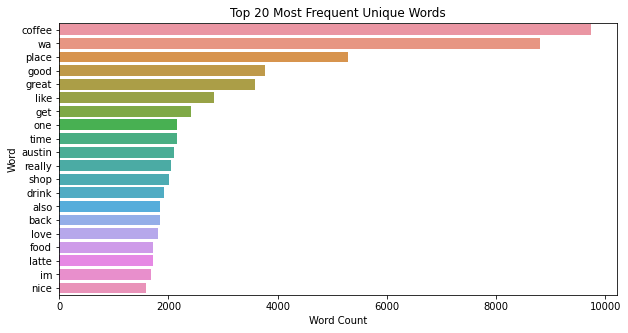

In [7]:
# Count the number of occurrences of each unique word and create a bar chart of the top 20 most frequent unique words
unique_word_count = review_text_no_stop_words.str.split(expand=True).stack().value_counts()
top_unique_words = unique_word_count.loc[unique_word_count.index.isin(unique_words)].head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_unique_words.values, y=top_unique_words.index)
plt.title('Top 20 Most Frequent Unique Words')
plt.xlabel('Word Count')
plt.ylabel('Word')

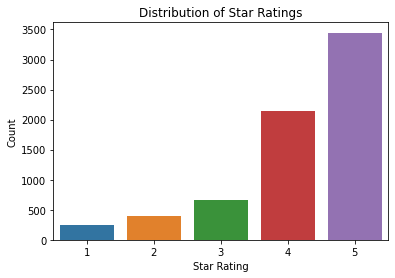

In [8]:
# Create a countplot of the star ratings using Seaborn
sns.countplot(x=df['star_rating'])

# Add some labels and titles
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Distribution of Star Ratings')

# Show the plot
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


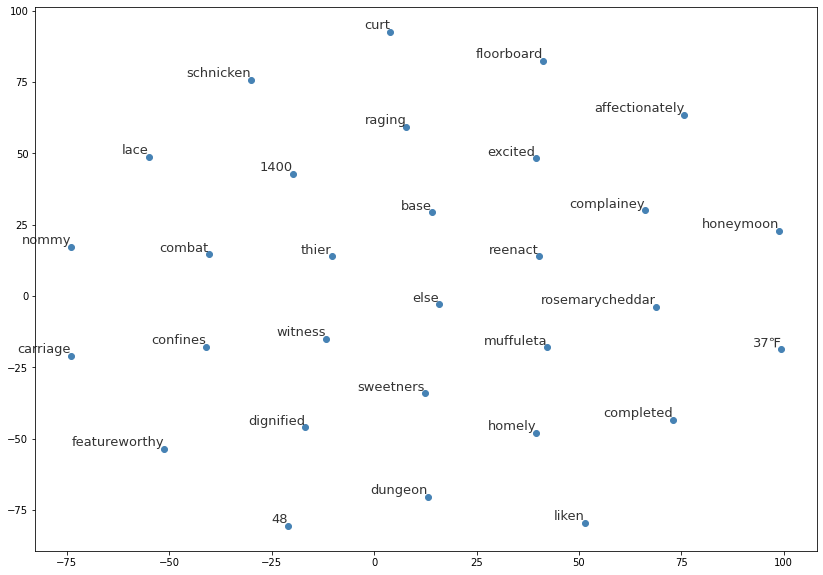

In [9]:
#Visualizing the word vector space of the dataset
unique_words_no_stop_words = remove_stop_words(''.join(list(unique_words)))
vectorizer = CountVectorizer()
word_embeddings = vectorizer.fit_transform(review_text_no_stop_words)
viz_words = 30
tsne = TSNE()
embed_tsne = tsne.fit_transform(word_embeddings[:viz_words, :])
fig, ax = plt.subplots(figsize=(14, 10))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    int_to_vocab = {i: word for i, word in enumerate(set(unique_words))}
    plt.annotate(int_to_vocab[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.8, fontsize=13, color='black', horizontalalignment='right', verticalalignment='bottom')